In [45]:
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# data, cluster_id = make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)

# Kmean = skl_cluster.KMeans(n_clusters=4)
# Kmean.fit(data)
# clusters = Kmean.predict(data)

# plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
# for cluster_x, cluster_y in Kmean.cluster_centers_:
#     plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

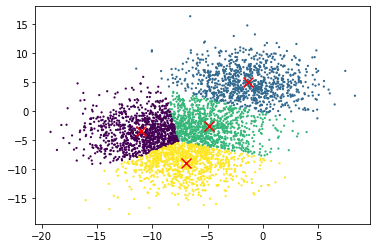

In [11]:
# data, cluster_id = make_blobs(n_samples=4000, cluster_std=3, centers=4, random_state=1)

# Kmean = skl_cluster.KMeans(n_clusters=4)
# Kmean.fit(data)
# clusters = Kmean.predict(data)

# plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
# for cluster_x, cluster_y in Kmean.cluster_centers_:
#     plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

(2, 2)


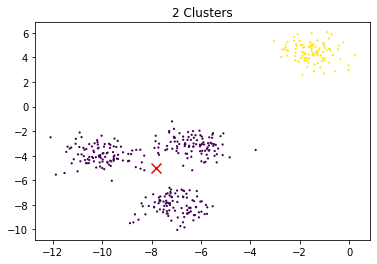

(2, 2)


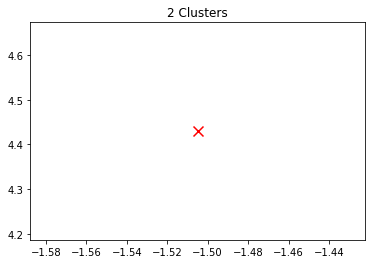

(3, 2)


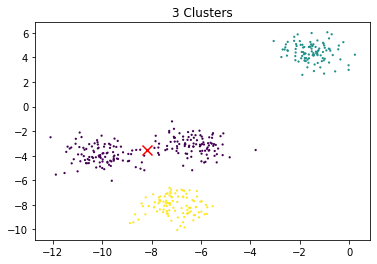

(3, 2)


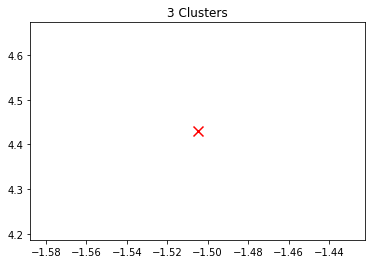

(3, 2)


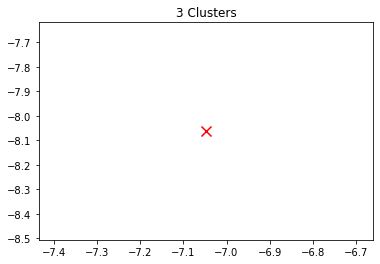

(4, 2)


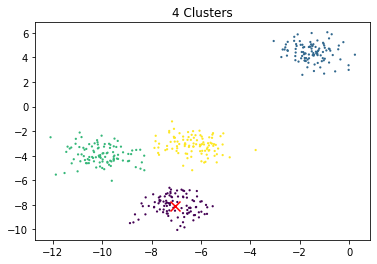

(4, 2)


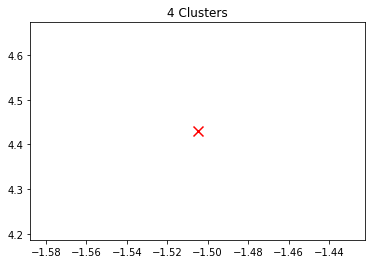

(4, 2)


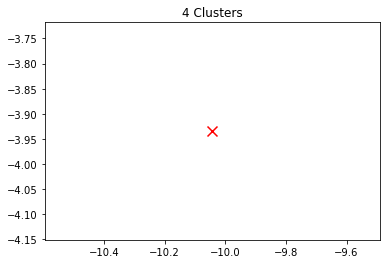

(4, 2)


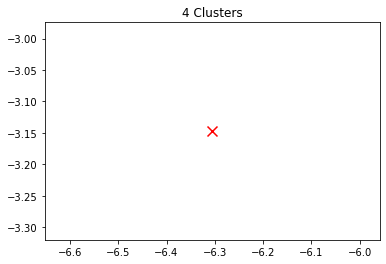

(5, 2)


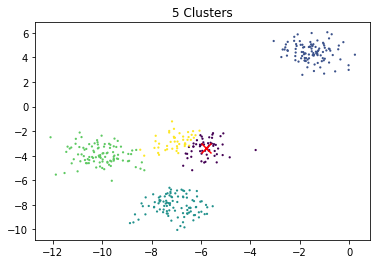

(5, 2)


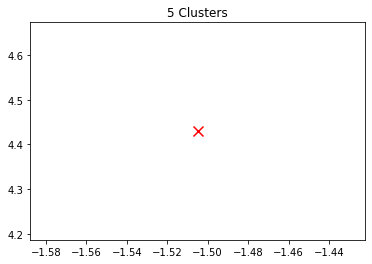

(5, 2)


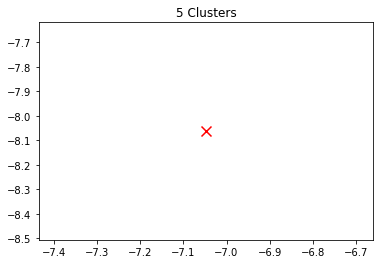

(5, 2)


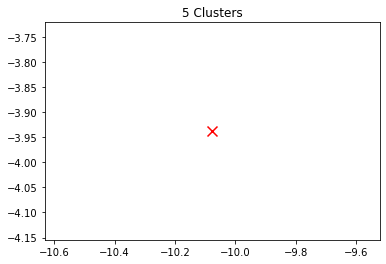

(5, 2)


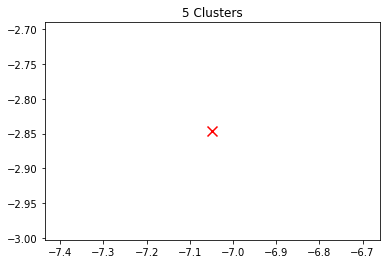

(6, 2)


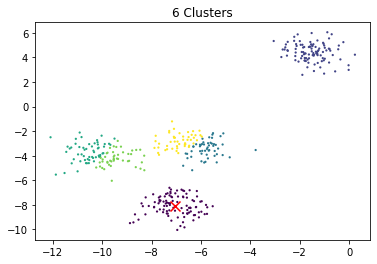

(6, 2)


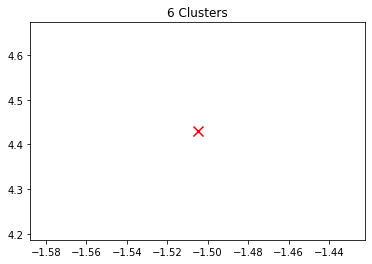

(6, 2)


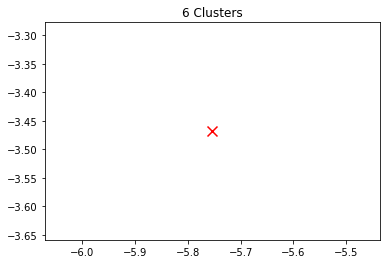

(6, 2)


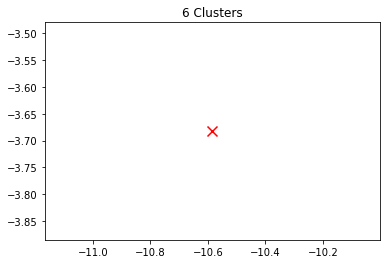

(6, 2)


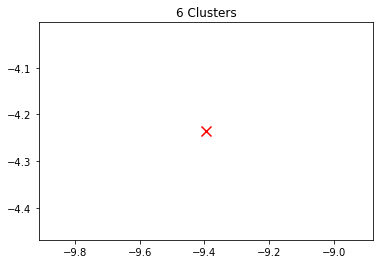

(6, 2)


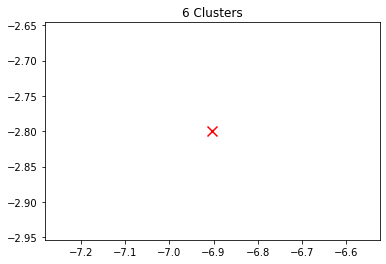

(7, 2)


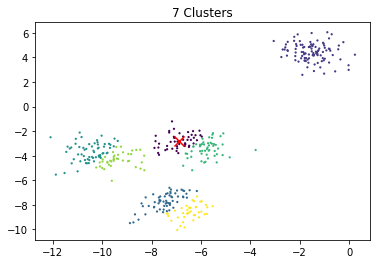

(7, 2)


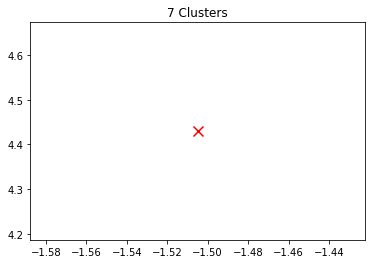

(7, 2)


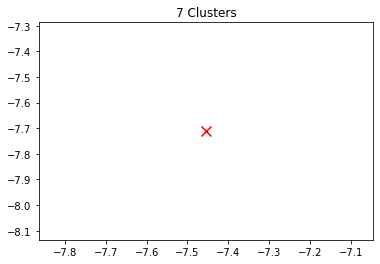

(7, 2)


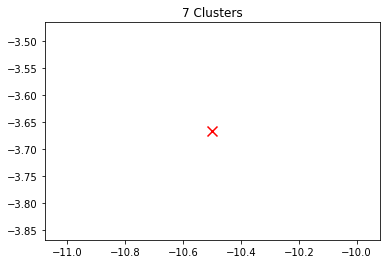

(7, 2)


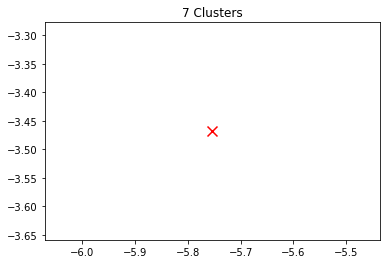

(7, 2)


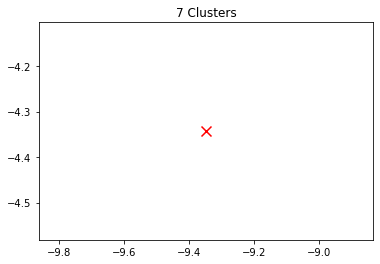

(7, 2)


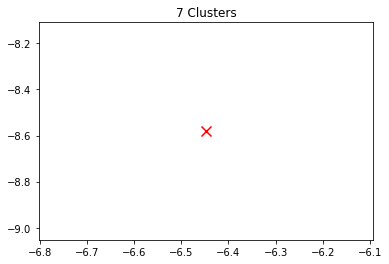

(8, 2)


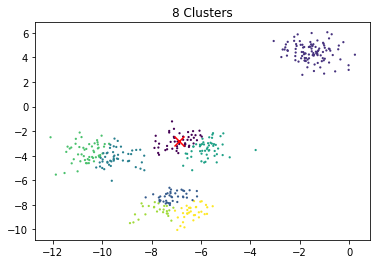

(8, 2)


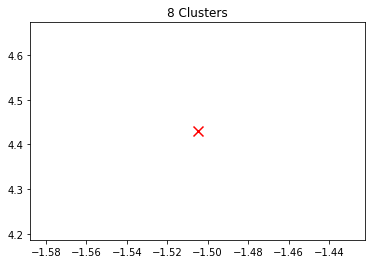

(8, 2)


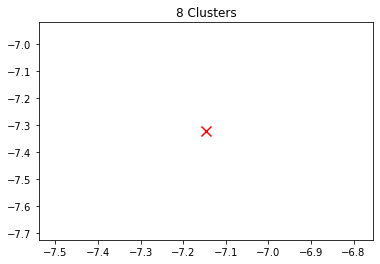

(8, 2)


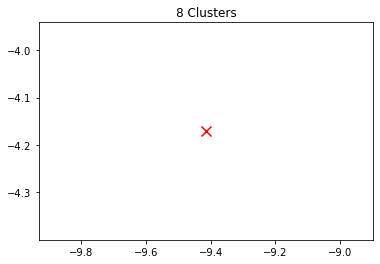

(8, 2)


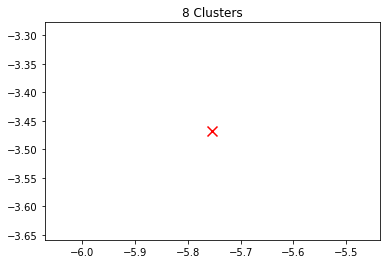

(8, 2)


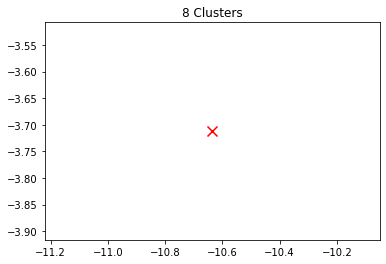

(8, 2)


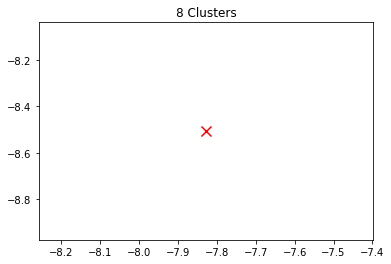

(8, 2)


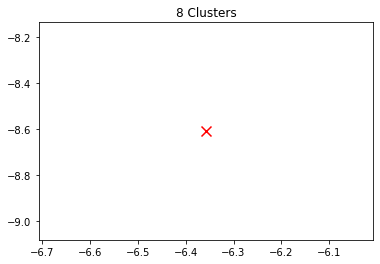

(9, 2)


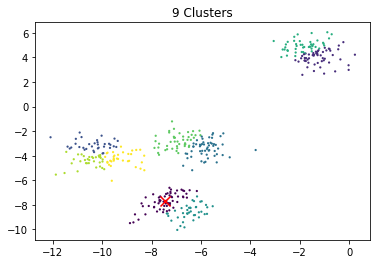

(9, 2)


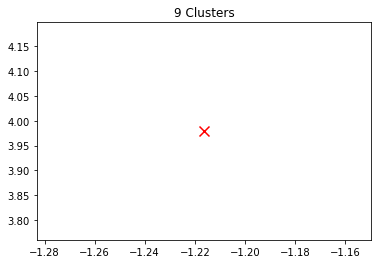

(9, 2)


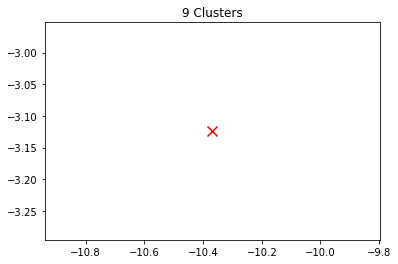

(9, 2)


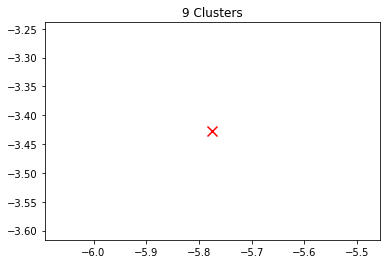

(9, 2)


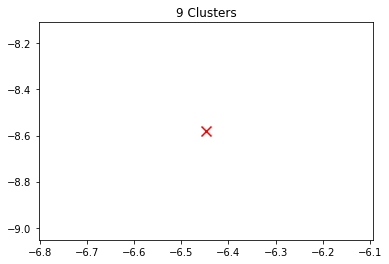

(9, 2)


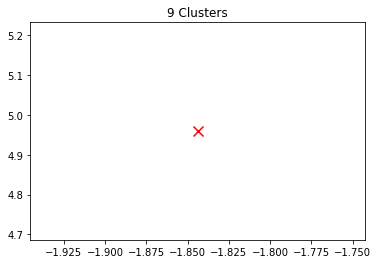

(9, 2)


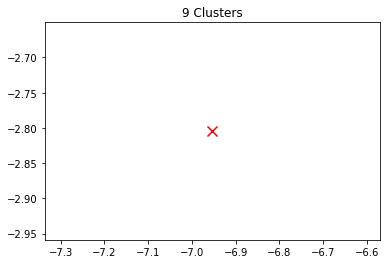

(9, 2)


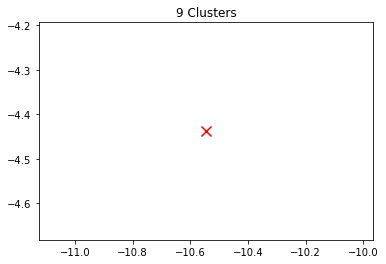

(9, 2)


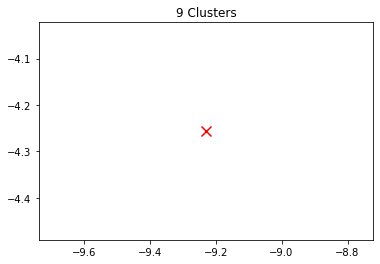

(10, 2)


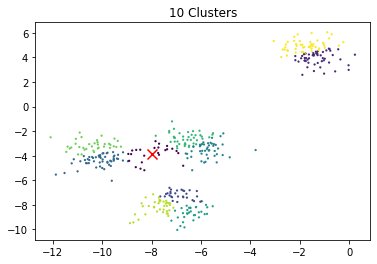

(10, 2)


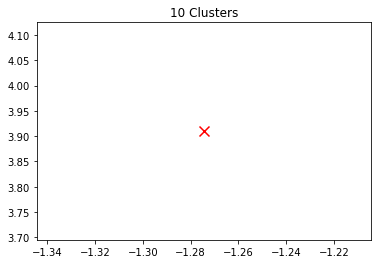

(10, 2)


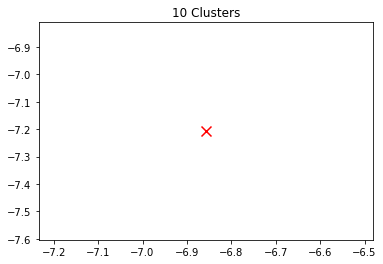

(10, 2)


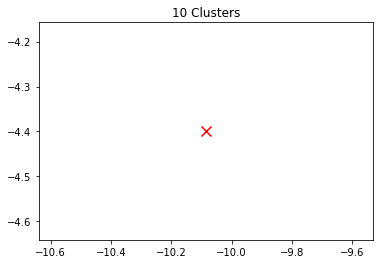

(10, 2)


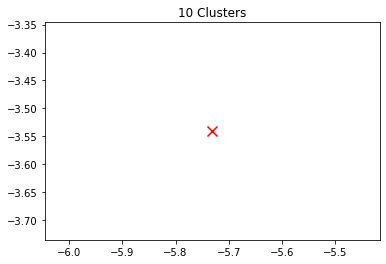

(10, 2)


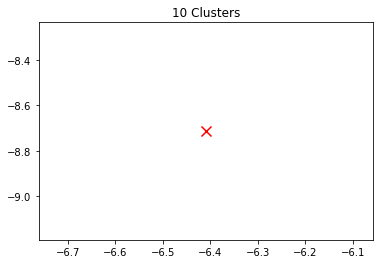

(10, 2)


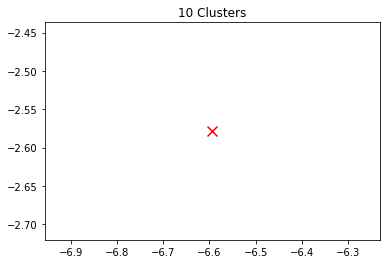

(10, 2)


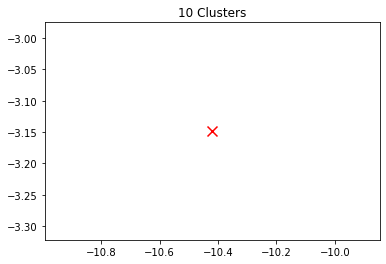

(10, 2)


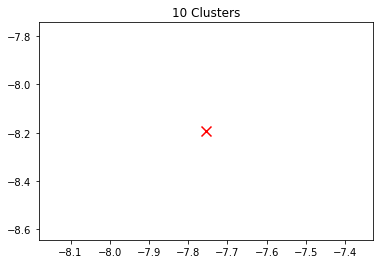

(10, 2)


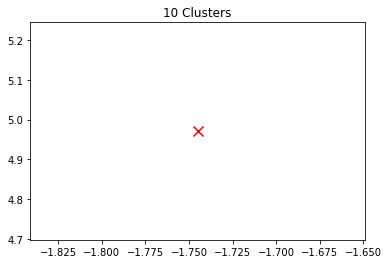

'\nNone of these look very sensible clusterings because all\nthe points really form one large cluster.\nWe might look at a measure of similarity of the cluster to \ntest if its really multiple clusters. A simple standard deviation or interquartile range might be a good starting point.\n'

In [26]:
#     for cluster_count in range(2,11):
#         Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
#         Kmean.fit(data)
#         clusters = Kmean.predict(data)
#         plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0,c=clusters)
#         for cluster_x, cluster_y in Kmean.cluster_centers_:
#             print(Kmean.cluster_centers_.shape)
#             plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
#            # give the graph a title with the number of clusters
#             plt.title(str(cluster_count)+" Clusters")
#             plt.show()
     
'''
None of these look very sensible clusterings because all
the points really form one large cluster.
We might look at a measure of similarity of the cluster to 
test if its really multiple clusters. A simple standard deviation or interquartile range might be a good starting point.
'''

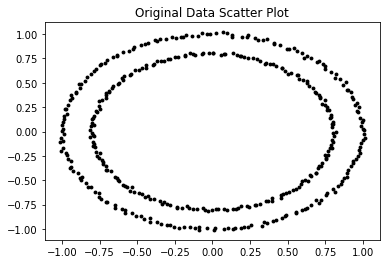

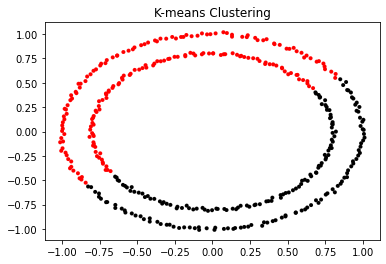

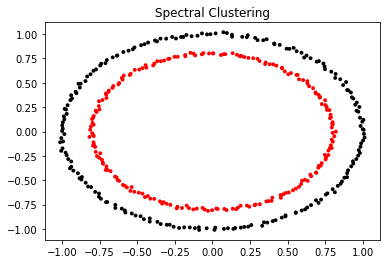

In [49]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, color = 'black')
plt.title("Original Data Scatter Plot")
plt.show()

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.title("K-means Clustering")
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
plt.title("Spectral Clustering")
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.show()


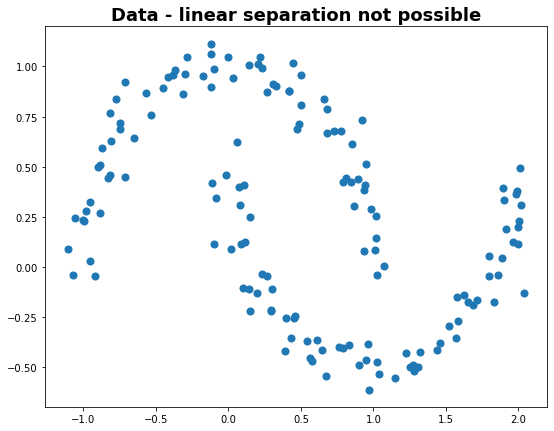

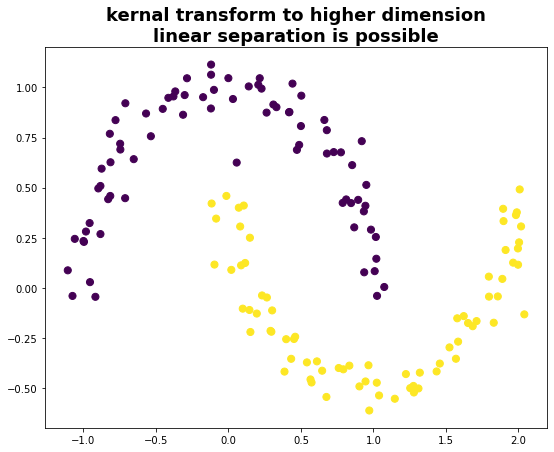

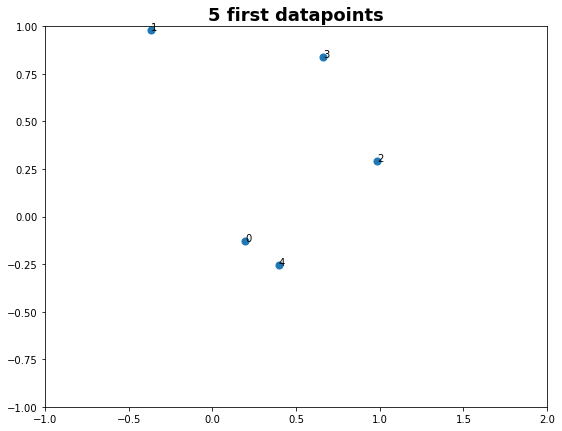

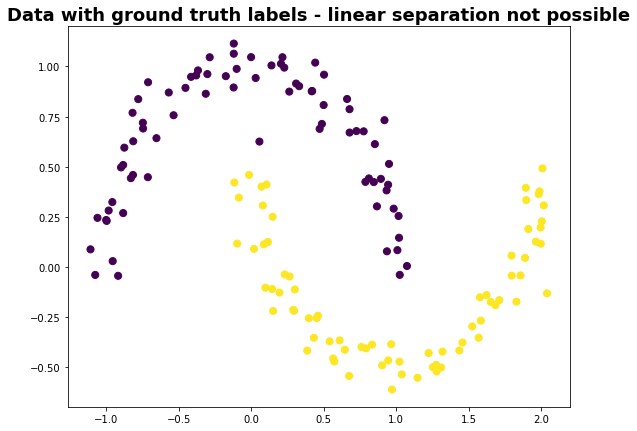

In [44]:

import warnings
warnings.filterwarnings("ignore") 
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)

cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],s=dot_size)
# ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size)
plt.show()



# K-means clustering


# spectral clustering built in sci-kit learn package 
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)


#spectral Clustering  from scratch 
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
# A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('5 first datapoints', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:5, 0], X_mn[:5, 1],s=dot_size, cmap=cmap)
for i in range(5):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))
    
from scipy.sparse import csgraph
L = csgraph.laplacian(A, normed=False)
L[:5,:5]
    
    
eigval, eigvec = np.linalg.eig(L)
np.where(eigval == np.partition(eigval, 1)[1])# the second smallest eigenvalue

y_spec =eigvec[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_mn.shape,y_spec.shape

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)
